In [2]:
var openDigger = require('../src/open_digger');var query = openDigger.driver.clickhouse.query;

[
  443, 486, 232, 281, 243, 436, 595, 398,
  619, 579, 521, 715, 506, 496, 471, 398,
  332, 384, 385, 237, 163, 409, 189, 194,
  167, 138, 151, 280, 164, 273,  77,  47,
  130, 133,  74,  41,  39,  73,  24,  -5
]
[
  [ '201702', 443 ], [ '201703', 486 ], [ '201704', 232 ],
  [ '201705', 281 ], [ '201706', 243 ], [ '201707', 436 ],
  [ '201708', 595 ], [ '201709', 398 ], [ '201710', 619 ],
  [ '201711', 579 ], [ '201712', 521 ], [ '201801', 715 ],
  [ '201802', 506 ], [ '201803', 496 ], [ '201804', 471 ],
  [ '201805', 398 ], [ '201806', 332 ], [ '201807', 384 ],
  [ '201808', 385 ], [ '201809', 237 ], [ '201810', 163 ],
  [ '201811', 409 ], [ '201812', 189 ], [ '201901', 194 ],
  [ '201902', 167 ], [ '201903', 138 ], [ '201904', 151 ],
  [ '201905', 280 ], [ '201906', 164 ], [ '201908', 273 ],
  [ '201909', 77 ],  [ '201910', 47 ],  [ '201911', 130 ],
  [ '201912', 133 ], [ '202002', 74 ],  [ '202003', 41 ],
  [ '202004', 39 ],  [ '202007', 73 ],  [ '202008', 24 ],
  [ '202009', -5 ]
]

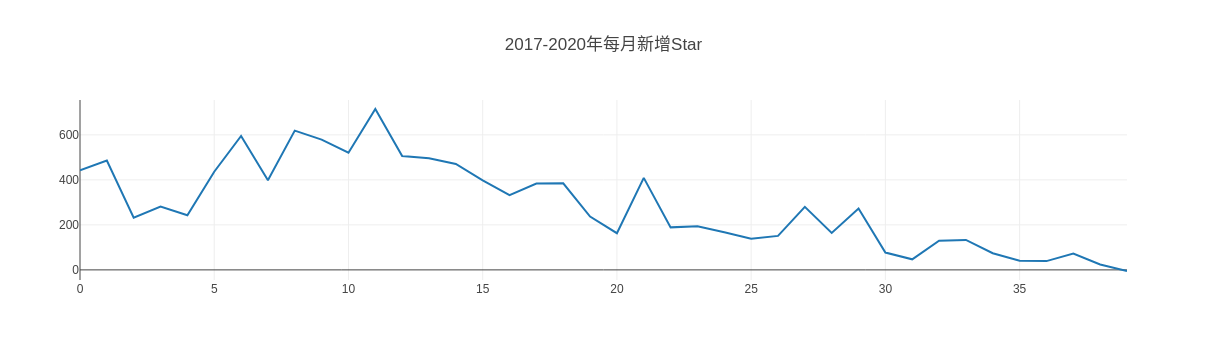

┌─────────┬──────────┬─────┐
│ (index) │    0     │  1  │
├─────────┼──────────┼─────┤
│    0    │ '201702' │ 443 │
│    1    │ '201703' │ 486 │
│    2    │ '201704' │ 232 │
│    3    │ '201705' │ 281 │
│    4    │ '201706' │ 243 │
│    5    │ '201707' │ 436 │
│    6    │ '201708' │ 595 │
│    7    │ '201709' │ 398 │
│    8    │ '201710' │ 619 │
│    9    │ '201711' │ 579 │
│   10    │ '201712' │ 521 │
│   11    │ '201801' │ 715 │
│   12    │ '201802' │ 506 │
│   13    │ '201803' │ 496 │
│   14    │ '201804' │ 471 │
│   15    │ '201805' │ 398 │
│   16    │ '201806' │ 332 │
│   17    │ '201807' │ 384 │
│   18    │ '201808' │ 385 │
│   19    │ '201809' │ 237 │
│   20    │ '201810' │ 163 │
│   21    │ '201811' │ 409 │
│   22    │ '201812' │ 189 │
│   23    │ '201901' │ 194 │
│   24    │ '201902' │ 167 │
│   25    │ '201903' │ 138 │
│   26    │ '201904' │ 151 │
│   27    │ '201905' │ 280 │
│   28    │ '201906' │ 164 │
│   29    │ '201908' │ 273 │
│   30    │ '201909' │ 77  │
│   31    │ '2

In [52]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_stargazers_count)as count
from github_log.year2017 
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_stargazers_count)as count
from github_log.year2018 
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_stargazers_count)as count
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_stargazers_count)as count
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
`).then(res=>{
        for(var m=1;m<=40;m++)
                (data.push(res[m].count-res[m-1].count),
                 data1.push([res[m].month,res[m].count-res[m-1].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月新增Star` })
        console.table(data1);


})

[
  19, 33, 24, 28, 18, 53, 43, 46, 49, 45,
  37, 61, 40, 36, 36, 40, 34, 41, 34, 30,
  16, 47, 30, 21, 25, 21, 15, 26, 14, 33,
   9,  6, 12, 10,  6,  1,  8,  8, -2, -1
]
[
  [ '201702', 19 ], [ '201703', 33 ], [ '201704', 24 ],
  [ '201705', 28 ], [ '201706', 18 ], [ '201707', 53 ],
  [ '201708', 43 ], [ '201709', 46 ], [ '201710', 49 ],
  [ '201711', 45 ], [ '201712', 37 ], [ '201801', 61 ],
  [ '201802', 40 ], [ '201803', 36 ], [ '201804', 36 ],
  [ '201805', 40 ], [ '201806', 34 ], [ '201807', 41 ],
  [ '201808', 34 ], [ '201809', 30 ], [ '201810', 16 ],
  [ '201811', 47 ], [ '201812', 30 ], [ '201901', 21 ],
  [ '201902', 25 ], [ '201903', 21 ], [ '201904', 15 ],
  [ '201905', 26 ], [ '201906', 14 ], [ '201908', 33 ],
  [ '201909', 9 ],  [ '201910', 6 ],  [ '201911', 12 ],
  [ '201912', 10 ], [ '202002', 6 ],  [ '202003', 1 ],
  [ '202004', 8 ],  [ '202007', 8 ],  [ '202008', -2 ],
  [ '202009', -1 ]
]


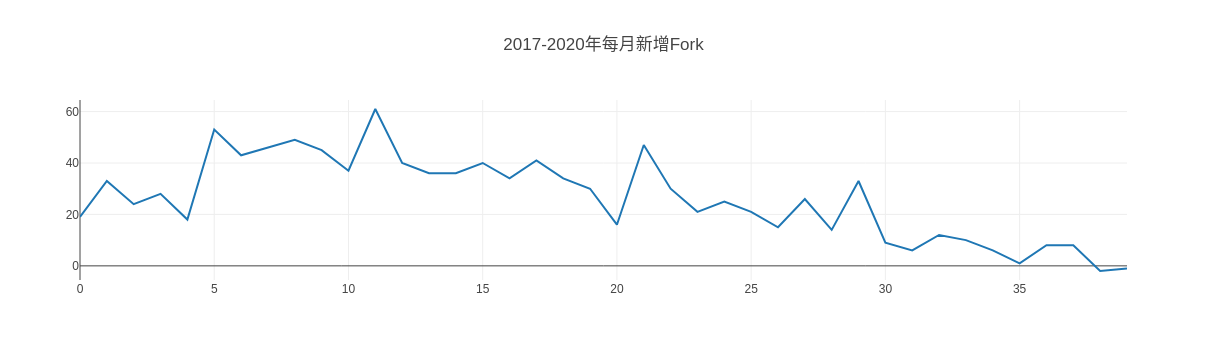

┌─────────┬──────────┬────┐
│ (index) │    0     │ 1  │
├─────────┼──────────┼────┤
│    0    │ '201702' │ 19 │
│    1    │ '201703' │ 33 │
│    2    │ '201704' │ 24 │
│    3    │ '201705' │ 28 │
│    4    │ '201706' │ 18 │
│    5    │ '201707' │ 53 │
│    6    │ '201708' │ 43 │
│    7    │ '201709' │ 46 │
│    8    │ '201710' │ 49 │
│    9    │ '201711' │ 45 │
│   10    │ '201712' │ 37 │
│   11    │ '201801' │ 61 │
│   12    │ '201802' │ 40 │
│   13    │ '201803' │ 36 │
│   14    │ '201804' │ 36 │
│   15    │ '201805' │ 40 │
│   16    │ '201806' │ 34 │
│   17    │ '201807' │ 41 │
│   18    │ '201808' │ 34 │
│   19    │ '201809' │ 30 │
│   20    │ '201810' │ 16 │
│   21    │ '201811' │ 47 │
│   22    │ '201812' │ 30 │
│   23    │ '201901' │ 21 │
│   24    │ '201902' │ 25 │
│   25    │ '201903' │ 21 │
│   26    │ '201904' │ 15 │
│   27    │ '201905' │ 26 │
│   28    │ '201906' │ 14 │
│   29    │ '201908' │ 33 │
│   30    │ '201909' │ 9  │
│   31    │ '201910' │ 6  │
│   32    │ '201911'

In [53]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_forks_count)as count
from github_log.year2017 
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_forks_count)as count
from github_log.year2018 
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_forks_count)as count
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_forks_count)as count
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
group by month
order by month
`).then(res=>{
        for(var m=1;m<=40;m++)
                (data.push(res[m].count-res[m-1].count),
                 data1.push([res[m].month,res[m].count-res[m-1].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月新增Fork` })
        console.table(data1);


})

[
  '42', '37',  '64', '91', '90', '50',
  '75', '103', '63', '55', '57', '46',
  '65', '73',  '51', '34', '25', '23',
  '39', '20',  '15', '11', '9',  '11',
  '11', '7',   '18', '6',  '16', '11',
  '4',  '5',   '6',  '5',  '1',  '7',
  '3',  '2',   '1',  '4',  '1',  '2',
  '1'
]
[
  [ '201701', '42' ], [ '201702', '37' ],  [ '201703', '64' ],
  [ '201704', '91' ], [ '201705', '90' ],  [ '201706', '50' ],
  [ '201707', '75' ], [ '201708', '103' ], [ '201709', '63' ],
  [ '201710', '55' ], [ '201711', '57' ],  [ '201712', '46' ],
  [ '201801', '65' ], [ '201802', '73' ],  [ '201803', '51' ],
  [ '201804', '34' ], [ '201805', '25' ],  [ '201806', '23' ],
  [ '201807', '39' ], [ '201808', '20' ],  [ '201809', '15' ],
  [ '201810', '11' ], [ '201811', '9' ],   [ '201812', '11' ],
  [ '201901', '11' ], [ '201902', '7' ],   [ '201903', '18' ],
  [ '201904', '6' ],  [ '201905', '16' ],  [ '201906', '11' ],
  [ '201907', '4' ],  [ '201908', '5' ],   [ '201909', '6' ],
  [ '201910', '5' ],  [ '

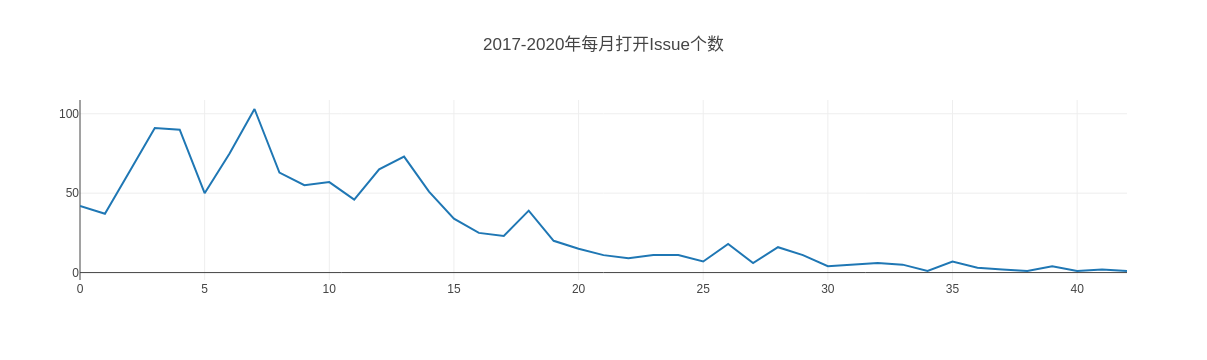

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201701' │ '42'  │
│    1    │ '201702' │ '37'  │
│    2    │ '201703' │ '64'  │
│    3    │ '201704' │ '91'  │
│    4    │ '201705' │ '90'  │
│    5    │ '201706' │ '50'  │
│    6    │ '201707' │ '75'  │
│    7    │ '201708' │ '103' │
│    8    │ '201709' │ '63'  │
│    9    │ '201710' │ '55'  │
│   10    │ '201711' │ '57'  │
│   11    │ '201712' │ '46'  │
│   12    │ '201801' │ '65'  │
│   13    │ '201802' │ '73'  │
│   14    │ '201803' │ '51'  │
│   15    │ '201804' │ '34'  │
│   16    │ '201805' │ '25'  │
│   17    │ '201806' │ '23'  │
│   18    │ '201807' │ '39'  │
│   19    │ '201808' │ '20'  │
│   20    │ '201809' │ '15'  │
│   21    │ '201810' │ '11'  │
│   22    │ '201811' │  '9'  │
│   23    │ '201812' │ '11'  │
│   24    │ '201901' │ '11'  │
│   25    │ '201902' │  '7'  │
│   26    │ '201903' │ '18'  │
│   27    │ '201904' │  '6'  │
│   28    │ '201905' │ '16'  │
│   29  

In [54]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2017 
where repo_id=70202506 
and type='IssuesEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2018 
where repo_id=70202506 
and type='IssuesEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2019
where repo_id=70202506 
and type='IssuesEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2020
where repo_id=70202506 
and type='IssuesEvent'
and action ='opened'
group by month
order by month
`).then(res=>{
        for(var m=0;m<=42;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月打开Issue个数` })
        console.table(res);


})

[
  '15', '19', '39', '57', '86',  '38',
  '49', '98', '61', '50', '58',  '32',
  '54', '21', '30', '4',  '16',  '8',
  '46', '10', '13', '3',  '1',   '3',
  '6',  '3',  '13', '8',  '7',   '186',
  '3',  '3',  '1',  '2',  '4',   '1',
  '2',  '1',  '1',  '1',  '237'
]
[
  [ '201701', '15' ],  [ '201702', '19' ],
  [ '201703', '39' ],  [ '201704', '57' ],
  [ '201705', '86' ],  [ '201706', '38' ],
  [ '201707', '49' ],  [ '201708', '98' ],
  [ '201709', '61' ],  [ '201710', '50' ],
  [ '201711', '58' ],  [ '201712', '32' ],
  [ '201801', '54' ],  [ '201802', '21' ],
  [ '201803', '30' ],  [ '201804', '4' ],
  [ '201805', '16' ],  [ '201806', '8' ],
  [ '201807', '46' ],  [ '201808', '10' ],
  [ '201809', '13' ],  [ '201810', '3' ],
  [ '201811', '1' ],   [ '201812', '3' ],
  [ '201901', '6' ],   [ '201902', '3' ],
  [ '201903', '13' ],  [ '201904', '8' ],
  [ '201905', '7' ],   [ '201906', '186' ],
  [ '201907', '3' ],   [ '201909', '3' ],
  [ '201910', '1' ],   [ '201911', '2' ],
  [ '2

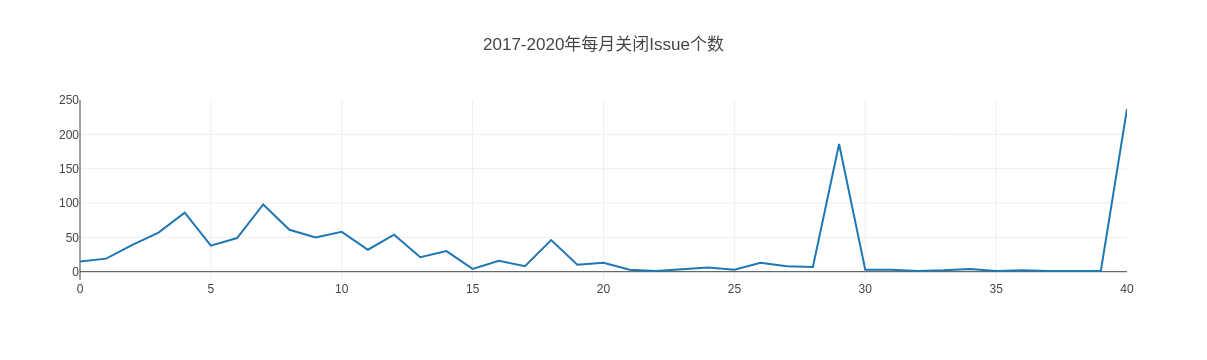

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201701' │ '15'  │
│    1    │ '201702' │ '19'  │
│    2    │ '201703' │ '39'  │
│    3    │ '201704' │ '57'  │
│    4    │ '201705' │ '86'  │
│    5    │ '201706' │ '38'  │
│    6    │ '201707' │ '49'  │
│    7    │ '201708' │ '98'  │
│    8    │ '201709' │ '61'  │
│    9    │ '201710' │ '50'  │
│   10    │ '201711' │ '58'  │
│   11    │ '201712' │ '32'  │
│   12    │ '201801' │ '54'  │
│   13    │ '201802' │ '21'  │
│   14    │ '201803' │ '30'  │
│   15    │ '201804' │  '4'  │
│   16    │ '201805' │ '16'  │
│   17    │ '201806' │  '8'  │
│   18    │ '201807' │ '46'  │
│   19    │ '201808' │ '10'  │
│   20    │ '201809' │ '13'  │
│   21    │ '201810' │  '3'  │
│   22    │ '201811' │  '1'  │
│   23    │ '201812' │  '3'  │
│   24    │ '201901' │  '6'  │
│   25    │ '201902' │  '3'  │
│   26    │ '201903' │ '13'  │
│   27    │ '201904' │  '8'  │
│   28    │ '201905' │  '7'  │
│   29  

In [55]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2017 
where repo_id=70202506 
and type='IssuesEvent'
and action ='closed'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2018 
where repo_id=70202506 
and type='IssuesEvent'
and action ='closed'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2019
where repo_id=70202506 
and type='IssuesEvent'
and action ='closed'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2020
where repo_id=70202506 
and type='IssuesEvent'
and action ='closed'
group by month
order by month
`).then(res=>{
        for(var m=0;m<=40;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月关闭Issue个数` })
        console.table(res);


})

[
  '45', '27', '23', '40', '107', '53',
  '54', '74', '60', '49', '26',  '33',
  '44', '38', '12', '10', '10',  '7',
  '15', '5',  '9',  '5',  '1',   '4',
  '11', '3',  '11', '1',  '8',   '6',
  '3',  '2',  '1',  '3',  '2',   '3',
  '1',  '1',  '2',  '2',  '1'
]
[
  [ '201701', '45' ],  [ '201702', '27' ],
  [ '201703', '23' ],  [ '201704', '40' ],
  [ '201705', '107' ], [ '201706', '53' ],
  [ '201707', '54' ],  [ '201708', '74' ],
  [ '201709', '60' ],  [ '201710', '49' ],
  [ '201711', '26' ],  [ '201712', '33' ],
  [ '201801', '44' ],  [ '201802', '38' ],
  [ '201803', '12' ],  [ '201804', '10' ],
  [ '201805', '10' ],  [ '201806', '7' ],
  [ '201807', '15' ],  [ '201808', '5' ],
  [ '201809', '9' ],   [ '201810', '5' ],
  [ '201811', '1' ],   [ '201812', '4' ],
  [ '201901', '11' ],  [ '201902', '3' ],
  [ '201903', '11' ],  [ '201904', '1' ],
  [ '201905', '8' ],   [ '201906', '6' ],
  [ '201908', '3' ],   [ '201909', '2' ],
  [ '201910', '1' ],   [ '201911', '3' ],
  [ '201912'

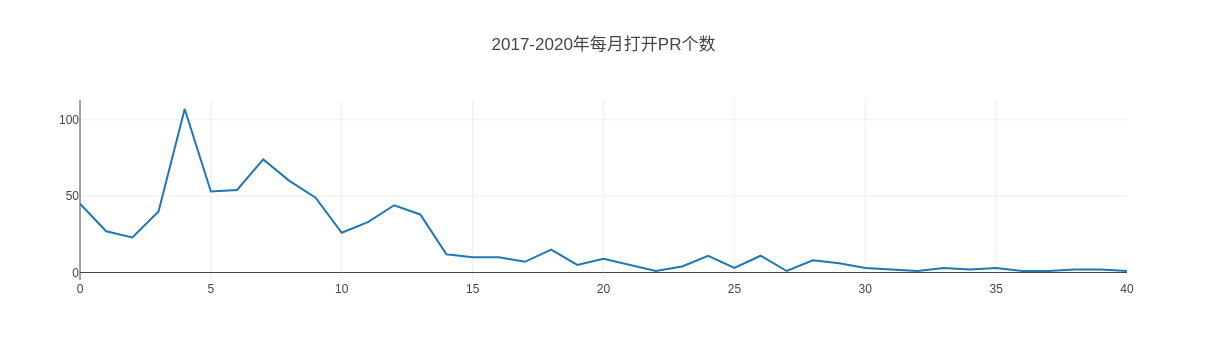

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201701' │ '45'  │
│    1    │ '201702' │ '27'  │
│    2    │ '201703' │ '23'  │
│    3    │ '201704' │ '40'  │
│    4    │ '201705' │ '107' │
│    5    │ '201706' │ '53'  │
│    6    │ '201707' │ '54'  │
│    7    │ '201708' │ '74'  │
│    8    │ '201709' │ '60'  │
│    9    │ '201710' │ '49'  │
│   10    │ '201711' │ '26'  │
│   11    │ '201712' │ '33'  │
│   12    │ '201801' │ '44'  │
│   13    │ '201802' │ '38'  │
│   14    │ '201803' │ '12'  │
│   15    │ '201804' │ '10'  │
│   16    │ '201805' │ '10'  │
│   17    │ '201806' │  '7'  │
│   18    │ '201807' │ '15'  │
│   19    │ '201808' │  '5'  │
│   20    │ '201809' │  '9'  │
│   21    │ '201810' │  '5'  │
│   22    │ '201811' │  '1'  │
│   23    │ '201812' │  '4'  │
│   24    │ '201901' │ '11'  │
│   25    │ '201902' │  '3'  │
│   26    │ '201903' │ '11'  │
│   27    │ '201904' │  '1'  │
│   28    │ '201905' │  '8'  │
│   29  

In [56]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2017 
where repo_id=70202506 
and type='PullRequestEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2018 
where repo_id=70202506 
and type='PullRequestEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
and action ='opened'
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
and action ='opened'
group by month
order by month
`).then(res=>{
        for(var m=0;m<=40;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月打开PR个数` })
        console.table(res);


})

[
  '32', '17', '12', '34', '86', '45',
  '38', '59', '57', '37', '20', '28',
  '29', '28', '10', '10', '4',  '1',
  '21', '2',  '1',  '9',  '3',  '10',
  '3',  '6',  '4',  '1',  '1',  '1'
]
[
  [ '201701', '32' ], [ '201702', '17' ],
  [ '201703', '12' ], [ '201704', '34' ],
  [ '201705', '86' ], [ '201706', '45' ],
  [ '201707', '38' ], [ '201708', '59' ],
  [ '201709', '57' ], [ '201710', '37' ],
  [ '201711', '20' ], [ '201712', '28' ],
  [ '201801', '29' ], [ '201802', '28' ],
  [ '201803', '10' ], [ '201804', '10' ],
  [ '201805', '4' ],  [ '201806', '1' ],
  [ '201807', '21' ], [ '201809', '2' ],
  [ '201810', '1' ],  [ '201901', '9' ],
  [ '201902', '3' ],  [ '201903', '10' ],
  [ '201904', '3' ],  [ '201905', '6' ],
  [ '201906', '4' ],  [ '201908', '1' ],
  [ '202004', '1' ],  [ '202009', '1' ]
]


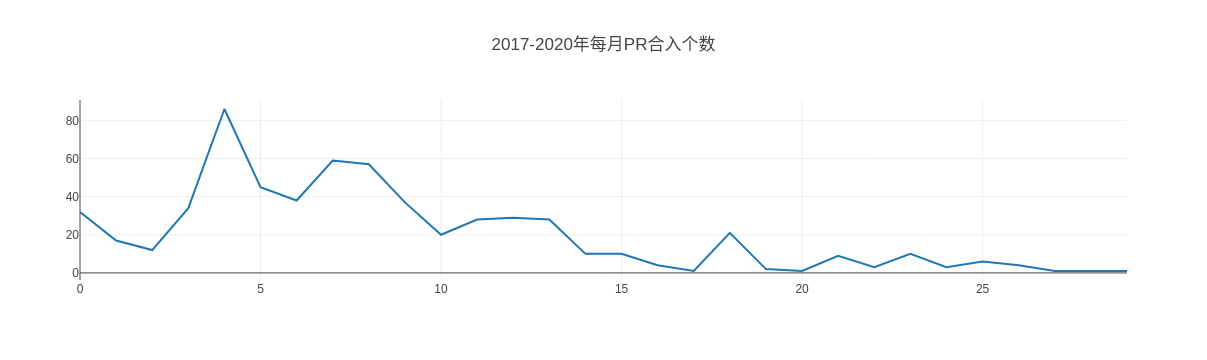

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201701' │ '32'  │
│    1    │ '201702' │ '17'  │
│    2    │ '201703' │ '12'  │
│    3    │ '201704' │ '34'  │
│    4    │ '201705' │ '86'  │
│    5    │ '201706' │ '45'  │
│    6    │ '201707' │ '38'  │
│    7    │ '201708' │ '59'  │
│    8    │ '201709' │ '57'  │
│    9    │ '201710' │ '37'  │
│   10    │ '201711' │ '20'  │
│   11    │ '201712' │ '28'  │
│   12    │ '201801' │ '29'  │
│   13    │ '201802' │ '28'  │
│   14    │ '201803' │ '10'  │
│   15    │ '201804' │ '10'  │
│   16    │ '201805' │  '4'  │
│   17    │ '201806' │  '1'  │
│   18    │ '201807' │ '21'  │
│   19    │ '201809' │  '2'  │
│   20    │ '201810' │  '1'  │
│   21    │ '201901' │  '9'  │
│   22    │ '201902' │  '3'  │
│   23    │ '201903' │ '10'  │
│   24    │ '201904' │  '3'  │
│   25    │ '201905' │  '6'  │
│   26    │ '201906' │  '4'  │
│   27    │ '201908' │  '1'  │
│   28    │ '202004' │  '1'  │
│   29  

In [57]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2017 
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged=1
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2018 
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged=1
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged=1
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged=1
group by month
order by month
`).then(res=>{
        for(var m=0;m<=29;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月PR合入个数` })
        console.table(res);


})

[
  '44',  '43',  '72',  '69',  '75',  '58',
  '86',  '132', '107', '106', '106', '86',
  '118', '117', '102', '81',  '71',  '59',
  '100', '56',  '59',  '48',  '34',  '39',
  '43',  '41',  '67',  '39',  '36',  '119',
  '18',  '16',  '15',  '13',  '9',   '17',
  '9',   '11',  '4',   '10',  '6',   '5',
  '10',  '4',   '261', '1',   '1',   '1'
]
[
  [ '201701', '44' ],  [ '201702', '43' ],  [ '201703', '72' ],
  [ '201704', '69' ],  [ '201705', '75' ],  [ '201706', '58' ],
  [ '201707', '86' ],  [ '201708', '132' ], [ '201709', '107' ],
  [ '201710', '106' ], [ '201711', '106' ], [ '201712', '86' ],
  [ '201801', '118' ], [ '201802', '117' ], [ '201803', '102' ],
  [ '201804', '81' ],  [ '201805', '71' ],  [ '201806', '59' ],
  [ '201807', '100' ], [ '201808', '56' ],  [ '201809', '59' ],
  [ '201810', '48' ],  [ '201811', '34' ],  [ '201812', '39' ],
  [ '201901', '43' ],  [ '201902', '41' ],  [ '201903', '67' ],
  [ '201904', '39' ],  [ '201905', '36' ],  [ '201906', '119' ],
  [ '2019

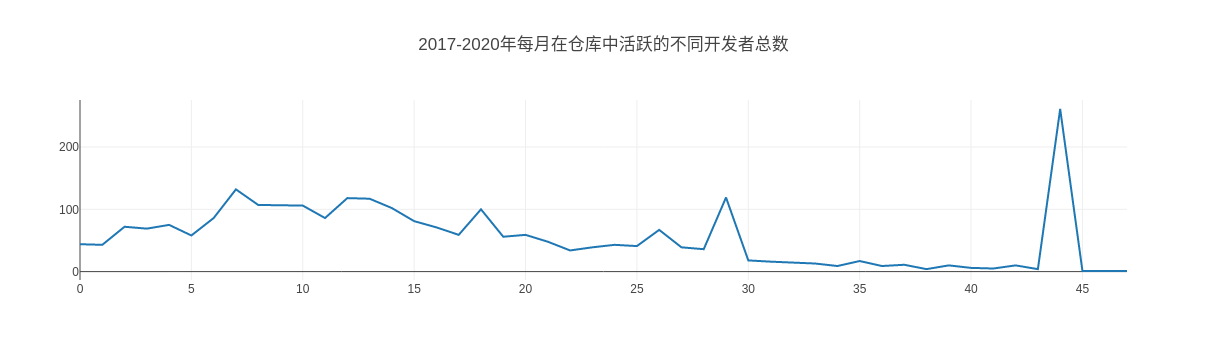

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201701' │ '44'  │
│    1    │ '201702' │ '43'  │
│    2    │ '201703' │ '72'  │
│    3    │ '201704' │ '69'  │
│    4    │ '201705' │ '75'  │
│    5    │ '201706' │ '58'  │
│    6    │ '201707' │ '86'  │
│    7    │ '201708' │ '132' │
│    8    │ '201709' │ '107' │
│    9    │ '201710' │ '106' │
│   10    │ '201711' │ '106' │
│   11    │ '201712' │ '86'  │
│   12    │ '201801' │ '118' │
│   13    │ '201802' │ '117' │
│   14    │ '201803' │ '102' │
│   15    │ '201804' │ '81'  │
│   16    │ '201805' │ '71'  │
│   17    │ '201806' │ '59'  │
│   18    │ '201807' │ '100' │
│   19    │ '201808' │ '56'  │
│   20    │ '201809' │ '59'  │
│   21    │ '201810' │ '48'  │
│   22    │ '201811' │ '34'  │
│   23    │ '201812' │ '39'  │
│   24    │ '201901' │ '43'  │
│   25    │ '201902' │ '41'  │
│   26    │ '201903' │ '67'  │
│   27    │ '201904' │ '39'  │
│   28    │ '201905' │ '36'  │
│   29  

In [58]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(distinct issue_author_id)as count
from github_log.year2017 
where repo_id=70202506 
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(distinct issue_author_id)as count
from github_log.year2018 
where repo_id=70202506 
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(distinct issue_author_id)as count
from github_log.year2019
where repo_id=70202506 
group by month
order by month
UNION ALL
Select toYear(created_at)*100+toMonth(created_at)as month,count(distinct issue_author_id)as count
from github_log.year2020
where repo_id=70202506 
group by month
order by month
`).then(res=>{
        for(var m=0;m<=47;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2017-2020年每月在仓库中活跃的不同开发者总数` })
        console.table(res);


})

In [59]:
var mean=0;
query(`Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2017
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2018
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2019
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2020
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
`).then(res=>{
    for(var m=0;m<=1289;m++)
        mean=mean+res[m].ans;
    mean=mean/1290
        
    console.log(mean);})


255.27903816752837


In [130]:
var mean=0;
var data=[];
query(`Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2017
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2018
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2019
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
UNION ALL
Select id,(issue_closed_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2020
where repo_id=70202506 
and type='IssuesEvent'
and issue_closed_at!='1970-01-01 00:00:00'
`).then(res=>{
    for(var m=0;m<=1289;m++)
    {data.push(res[m].ans)}
    data.sort();
    console.log((data[645]+data[646])/2);})


194.8555324074074


In [142]:
var mean=0;
query(`Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2017
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2018
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
`).then(res=>{
   for(var m=0;m<=608;m++)
      mean=mean+res[m].ans;
       mean=mean/609      
    console.log(mean);})

10.124698655963018


In [154]:
var mean=0;
var data=[];
query(`Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2017
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2018
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2019
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
UNION ALL
Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.year2020
where repo_id=70202506 
and type='PullRequestEvent'
and pull_merged_at!='1970-01-01 00:00:00'
and pull_merged=1
`).then(res=>{
   for(var m=0;m<=608;m++)
    {data.push(res[m].ans)}
     data.sort();
    console.log((data[304]+data[305])/2) 
    ;})

1.5918692129629628
